### Imports

In [ ]:
!pip install hvplot datashader bokeh
!pip install jupyter-bokeh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 119.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 85.6 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
# import hvplot.pandas
from sklearn.metrics.pairwise import rbf_kernel
from scipy.linalg import orth
from numpy.linalg import det
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.utils.class_weight import compute_class_weight

### Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fp1 = '/content/drive/MyDrive/DS260_SSSM/Project DS260/Scaled TrainingData/datatest_Core_target.csv'
df1 = pd.read_csv(fp1, parse_dates=['DateTime'], index_col=0)
df1 = df1.sort_values(by='DateTime')
display(df1.head())
print(df1.shape)

fp2 = '/content/drive/MyDrive/DS260_SSSM/Project DS260/Scaled TrainingData/datatest_Input.csv'
df2 = pd.read_csv(fp2, parse_dates=['DateTime'], index_col=0)
df2 = df2.sort_values(by='DateTime')
display(df2.head())
print(df2.shape)

,LabelVerbal,NumericLabel
DateTime,,
2020-01-02 05:00:00,0,0
2020-01-02 05:15:00,0,0
2020-01-02 05:30:00,0,0
2020-01-02 05:45:00,0,0
2020-01-02 06:00:00,0,0


(147003, 2)


,EURUSD@M5↦High,EURUSD@M5↦Low,Quant1,Quant2,Quant3,Quant4,Quant5,Quant6,Quant7,Quant8,...,Quant121,Quant122,Quant123,Quant124,Quant125,Quant126,Quant127,Quant128,Quant129,Quant130
DateTime,,,,,,,,,,,,,,,,,,,,,
2022-12-30 22:35:00,1.07028,1.07009,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2022-12-30 22:40:00,1.07025,1.07010,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-02 06:00:00,1.07017,1.07016,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-02 06:05:00,1.07015,1.06956,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-02 06:10:00,1.06972,1.06909,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


(217134, 132)


### EDA

In [ ]:
print(df1.describe())
print("\n", df2.describe())

        NumericLabel
count  147003.000000
mean       -0.064203
std         4.371794
min       -10.000000
25%        -3.000000
50%         0.000000
75%         3.000000
max        10.000000

        EURUSD@M5↦High  EURUSD@M5↦Low         Quant1         Quant2  \
count   217134.000000  217134.000000  217048.000000  217048.000000   
mean         1.095743       1.095380       1.095539       1.095482   
std          0.037118       0.037109       0.037111       0.037157   
min          1.019060       1.017720       1.017720       1.017720   
25%          1.072750       1.072440       1.072580       1.072480   
50%          1.087330       1.086990       1.087280       1.087150   
75%          1.111070       1.110710       1.110470       1.110360   
max          1.191830       1.189060       1.191830       1.191830   

              Quant3         Quant4         Quant5         Quant6  \
count  217048.000000  217048.000000  217134.000000  217134.000000   
mean        1.095556       1.095531     

In [ ]:
# min and max dates in both to make sure they overlap in terms of price

print(f"Minimum date within the target variable df: {df1['DateTime'].min()}")
print(f"Max date within the target variable df: {df1['DateTime'].max()}")

print(f"\nMinimum date within the input variable df: {df2['DateTime'].min()}")
print(f"Max date within the input variable df: {df2['DateTime'].max()}")

KeyError: 'DateTime'

In [ ]:
# count the amount of rows where high > low

# most of the dataset is this way so we can't determine when it went down or up explicility
# since we don't have an open/close column

len(df2[df2['EURUSD@M5↦High'] > df2['EURUSD@M5↦Low']]) / len(df2)

In [ ]:
# example of date times

start = pd.to_datetime("2022-12-30 00:00:00")
end   = pd.to_datetime("2022-12-30 23:59:59")

display(df1[(df1['DateTime'] >= start) & (df1['DateTime'] <= end)])
display(df2[(df2['DateTime'] >= start) & (df2['DateTime'] <= end)])

In [ ]:
# the M15 labels indicate the label within 15 minutes
# ['0' 'ZZH3' 'ZZH2' 'ZZH1' 'ZZH0' 'ZZH-1' 'ZZH-2' 'ZZH-3' 'Centroid_H_L'
# 'ZZL3' 'ZZL2' 'ZZL1' 'ZZL0' 'ZZL-1' 'ZZL-2' 'ZZL-3' 'Centroid_L_H'] --> can we get some context to these labels?

print(df1['LabelVerbal'].unique())
print(df1['NumericLabel'].unique())

['0' 'ZZH3' 'ZZH2' 'ZZH1' 'ZZH0' 'ZZH-1' 'ZZH-2' 'ZZH-3' 'Drop1'
 'Centroid_H_L' 'Drop2' 'ZZL3' 'ZZL2' 'ZZL1' 'ZZL0' 'ZZL-1' 'ZZL-2'
 'ZZL-3' 'Rally1' 'Centroid_L_H' 'Rally2']
[  0   4   5   6   7   8   9  10  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10
   1   2   3]


In [ ]:
# merge the dataframes where the dates and times align for a combined df

comb_df = pd.merge_asof(df2, df1, on="DateTime", allow_exact_matches=True, direction='backward')
display(comb_df.head())

,DateTime,EURUSD@M5↦High,EURUSD@M5↦Low,Quant1,Quant2,Quant3,Quant4,Quant5,Quant6,Quant7,...,Quant123,Quant124,Quant125,Quant126,Quant127,Quant128,Quant129,Quant130,LabelVerbal,NumericLabel
0,2022-12-30 22:35:00,1.07028,1.07009,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Centroid_H_L,-2
1,2022-12-30 22:40:00,1.07025,1.07010,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Centroid_H_L,-2
2,2023-01-02 06:00:00,1.07017,1.07016,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Drop2,-3
3,2023-01-02 06:05:00,1.07015,1.06956,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Drop2,-3
4,2023-01-02 06:10:00,1.06972,1.06909,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Drop2,-3


In [ ]:
# plot the input variables over time as well --> use the candle stick layout with the colors being the labels
# here's an example of a couple days worth of data color-coded by labels

start = pd.to_datetime("2022-12-30 00:00:00")
end   = pd.to_datetime("2023-01-10 23:59:59")
sample = comb_df[(comb_df['DateTime'] >= start) & (comb_df['DateTime'] <= end)]

colors = {
    "0": "#9E9E9E",

    # ZZH family (blue shades)
    "ZZH3":  "#003f5c",
    "ZZH2":  "#2f4b7c",
    "ZZH1":  "#465881",
    "ZZH0":  "#58789e",
    "ZZH-1": "#7a9ab8",
    "ZZH-2": "#9cc0d9",
    "ZZH-3": "#c7e3f2",

    # ZZL family (orange shades)
    "ZZL3":  "#8c3900",
    "ZZL2":  "#a64b00",
    "ZZL1":  "#cc6e00",
    "ZZL0":  "#e38f1e",
    "ZZL-1": "#f0a64c",
    "ZZL-2": "#f8c68a",
    "ZZL-3": "#ffe2c4",

    # other labels
    "Drop1": "#d62728",
    "Drop2": "#ff9896",
    "Rally1": "#2ca02c",
    "Rally2": "#98df8a",

    "Centroid_H_L": "#9467bd",
    "Centroid_L_H": "#c5b0d5"
}

fig = go.Figure()

for label in sample['LabelVerbal'].unique():
    df_label = sample[sample['LabelVerbal'] == label].sort_values('DateTime')

    # create x and y arrays with NaNs between points
    x_vals = []
    y_vals = []
    for _, row in df_label.iterrows():
        x_vals.extend([row['DateTime'], row['DateTime'], np.nan])  # add NaN to break line
        y_vals.extend([row['EURUSD@M5↦Low'], row['EURUSD@M5↦High'], np.nan])

    fig.add_trace(go.Scatter(
        x=x_vals,
        y=y_vals,
        mode='lines',
        line=dict(color=colors.get(label, 'gray'), width=2),
        name=label,
    ))

fig.update_layout(
    title='High-Low Lines Colored by M15 Label',
    xaxis_title='DateTime',
    yaxis_title='Price'
)

fig.show()

In [ ]:
diffs_df = comb_df['EURUSD@M5↦High'] - comb_df['EURUSD@M5↦Low']
print(diffs_df.min())
print(diffs_df.max())

0.0
0.01200000000000001


### Tokenize Numeric Features into Text

In [ ]:
# convert numeric features into a structured textual representation per row

def row_to_narrative(r):

    feats = [f"{c}={r[c]:.6f}" for c in r.index if "Quant" in c]
    return f"At {r['DateTime']}, we have: " + ", ".join(feats) + "."

comb_df['narrative'] = comb_df.apply(row_to_narrative, axis=1)


In [ ]:
comb_df.head()

,DateTime,EURUSD@M5↦High,EURUSD@M5↦Low,Quant1,Quant2,Quant3,Quant4,Quant5,Quant6,Quant7,...,Quant124,Quant125,Quant126,Quant127,Quant128,Quant129,Quant130,LabelVerbal,NumericLabel,narrative
0,2022-12-30 22:35:00,1.07028,1.07009,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Centroid_H_L,-2,"At 2022-12-30 22:35:00, we have: Quant1=nan, Q..."
1,2022-12-30 22:40:00,1.07025,1.07010,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Centroid_H_L,-2,"At 2022-12-30 22:40:00, we have: Quant1=nan, Q..."
2,2023-01-02 06:00:00,1.07017,1.07016,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Drop2,-3,"At 2023-01-02 06:00:00, we have: Quant1=nan, Q..."
3,2023-01-02 06:05:00,1.07015,1.06956,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Drop2,-3,"At 2023-01-02 06:05:00, we have: Quant1=nan, Q..."
4,2023-01-02 06:10:00,1.06972,1.06909,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Drop2,-3,"At 2023-01-02 06:10:00, we have: Quant1=nan, Q..."


In [ ]:
comb_df.shape

(217134, 136)

### Perplexity

In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
import numpy as np

# TODO: IGNORE THIS CELL DON'T RUN!!!

class NarrativeDataset(Dataset):
    def __init__(self, texts):
        self.texts = texts
    def __len__(self):
        return len(self.texts)
    def __getitem__(self, idx):
        return self.texts[idx]

# load model/tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")
model.resize_token_embeddings(len(tokenizer))
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
model.eval()

# data
texts = comb_df['narrative'].tolist()
dataset = NarrativeDataset(texts)
batch_size = 8
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

perplexities = []

for batch in dataloader:
    inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True, max_length=512)
    input_ids = inputs['input_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids)
        logits = outputs.logits

        # shift for language modeling
        shift_logits = logits[:, :-1, :].contiguous()
        shift_labels = input_ids[:, 1:].contiguous()
        shift_mask = attention_mask[:, 1:].contiguous()

        # compute per-token loss
        loss_fct = torch.nn.CrossEntropyLoss(reduction='none')
        per_token_loss = loss_fct(shift_logits.view(-1, shift_logits.size(-1)), shift_labels.view(-1))
        per_token_loss = per_token_loss.view(shift_labels.size())  # (batch, seq_len)

        # mask out padding
        per_token_loss = per_token_loss * shift_mask

        # sum loss per sequence and divide by number of non-pad tokens
        seq_loss = per_token_loss.sum(dim=1) / shift_mask.sum(dim=1)

        # compute perplexity
        seq_perplexity = torch.exp(seq_loss)
        perplexities.extend(seq_perplexity.cpu().numpy())

comb_df['perplexity'] = perplexities
comb_df.to_csv("/content/drive/MyDrive/DS260_SSSM/Project DS260/Siddhi's Code/dataframe_w_perplexity.csv")
print("Done!")


KeyboardInterrupt: 

In [ ]:
# visualize perplexities

# read in csv if available
comb_df_w_perplexity = pd.read_csv("/content/drive/MyDrive/DS260_SSSM/Project DS260/Siddhi's Code/dataframe_w_perplexity.csv")
comb_df_w_perplexity.head()


,Unnamed: 0,DateTime,EURUSD@M5↦High,EURUSD@M5↦Low,Quant1,Quant2,Quant3,Quant4,Quant5,Quant6,...,Quant125,Quant126,Quant127,Quant128,Quant129,Quant130,LabelVerbal,NumericLabel,narrative,perplexity
0,0,2022-12-30 22:35:00,1.07028,1.07009,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Centroid_H_L,-2,"At 2022-12-30 22:35:00, we have: Quant1=nan, Q...",2.224389
1,1,2022-12-30 22:40:00,1.07025,1.07010,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Centroid_H_L,-2,"At 2022-12-30 22:40:00, we have: Quant1=nan, Q...",2.194054
2,2,2023-01-02 06:00:00,1.07017,1.07016,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Drop2,-3,"At 2023-01-02 06:00:00, we have: Quant1=nan, Q...",2.116302
3,3,2023-01-02 06:05:00,1.07015,1.06956,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Drop2,-3,"At 2023-01-02 06:05:00, we have: Quant1=nan, Q...",2.614349
4,4,2023-01-02 06:10:00,1.06972,1.06909,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Drop2,-3,"At 2023-01-02 06:10:00, we have: Quant1=nan, Q...",2.759452


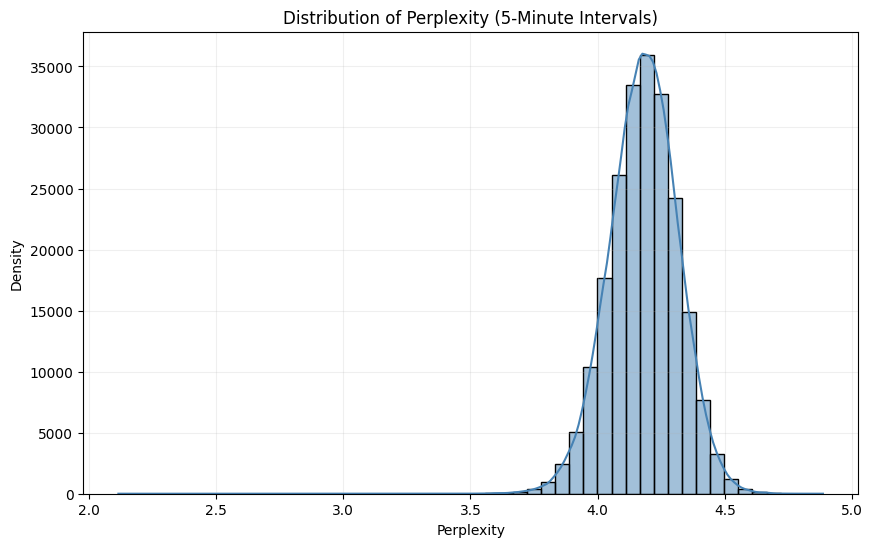

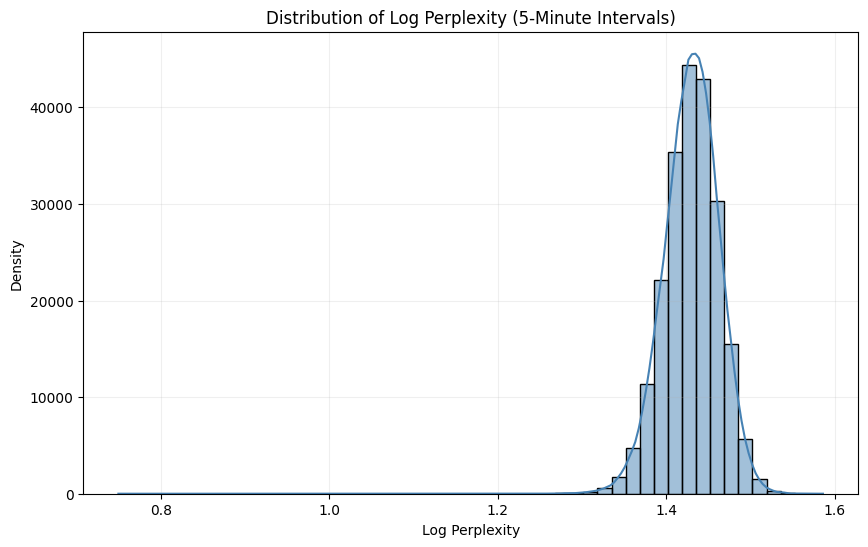

In [ ]:
# add log-perplexity column
comb_df_w_perplexity["log_perplexity"] = np.log(comb_df_w_perplexity["perplexity"])

# get a histogram of the perplexities by row
# distribution is normal right now
plt.figure(figsize=(10,6))
sns.histplot(
    comb_df_w_perplexity["perplexity"],
    bins=50,
    kde=True,
    color="steelblue"
)

plt.title("Distribution of Perplexity (5-Minute Intervals)")
plt.xlabel("Perplexity")
plt.ylabel("Density")
plt.grid(True, alpha=0.2)

plt.show()

# grab the log perplexity like the paper
plt.figure(figsize=(10,6))
sns.histplot(
    comb_df_w_perplexity["log_perplexity"],
    bins=50,
    kde=True, # adds density curve like the paper
    color="steelblue"
)

plt.title("Distribution of Log Perplexity (5-Minute Intervals)")
plt.xlabel("Log Perplexity")
plt.ylabel("Density")
plt.grid(True, alpha=0.2)

plt.show()

In [ ]:
# split up datapoints into low, medium, and high perplexity

low_perp, med_perp = comb_df_w_perplexity["log_perplexity"].quantile([0.33, 0.66])

def classify_ppl(x):
    if x <= low_perp:
        return "Low"
    elif x <= med_perp:
        return "Medium"
    else:
        return "High"

comb_df_w_perplexity["perp_group"] = comb_df_w_perplexity["log_perplexity"].apply(classify_ppl)

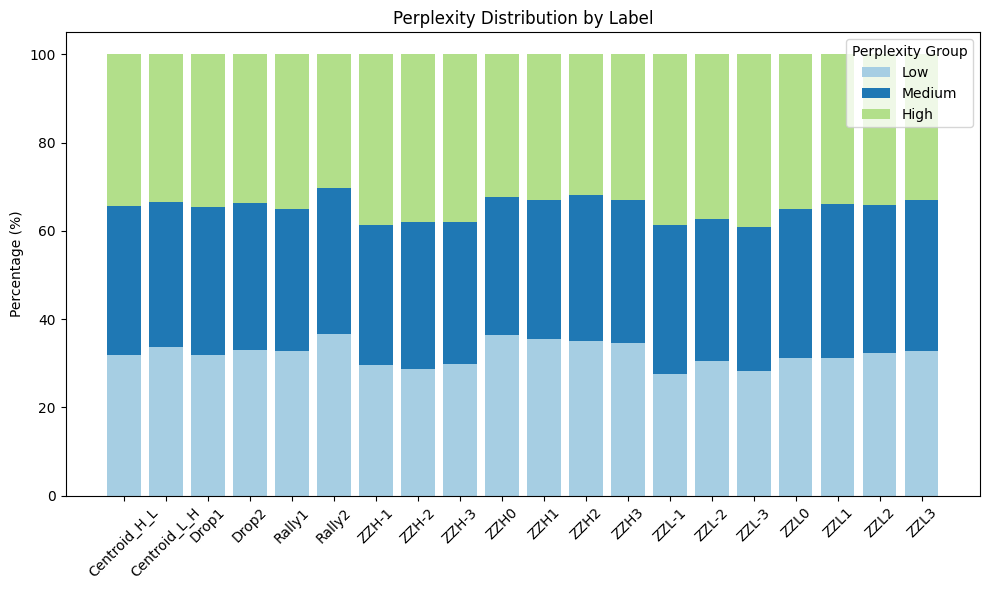

In [ ]:
# grab a bin count for each cohort of users

df = comb_df_w_perplexity.copy()
df = df[(df['NumericLabel'] != 0) & (df['NumericLabel'] != '')]

# Pivot table to get counts of each perp_group per label
pivot = df.pivot_table(index="LabelVerbal", columns="perp_group", aggfunc="size", fill_value=0)

# Convert counts to percentages per label and order columns
percentages = pivot.div(pivot.sum(axis=1), axis=0)[["Low", "Medium", "High"]] * 100

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bottom = np.zeros(len(percentages))
colors = ["#a6cee3", "#1f78b4", "#b2df8a"]  # Low → Medium → High

for i, group in enumerate(["Low", "Medium", "High"]):
    ax.bar(percentages.index, percentages[group], bottom=bottom, color=colors[i], label=group)
    bottom += percentages[group]

ax.set_ylabel("Percentage (%)")
ax.set_title("Perplexity Distribution by Label")
ax.legend(title="Perplexity Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Compute Diversity Using Determinantal Point Process

In [ ]:
comb_df_w_perplexity.columns

Index(['Unnamed: 0', 'DateTime', 'EURUSD@M5↦High', 'EURUSD@M5↦Low', 'Quant1',
       'Quant2', 'Quant3', 'Quant4', 'Quant5', 'Quant6',
       ...
       'Quant127', 'Quant128', 'Quant129', 'Quant130', 'LabelVerbal',
       'NumericLabel', 'narrative', 'perplexity', 'log_perplexity',
       'perp_group'],
      dtype='object', length=140)

In [ ]:
# compute similarity of each point using determinental process
# DPP: uses determinant to determine how similar feature embeddings are to each other
# small determinant = low probability of subset being chosen since the
# embeddings are too similar to each other

# prepare the embeddings
dpp_df = comb_df_w_perplexity.copy()

# create embedding vector
numeric_cols = ["EURUSD@M5↦High", "EURUSD@M5↦Low"] + [c for c in dpp_df.columns if "Quant" in c]
dpp_df = dpp_df[numeric_cols].fillna(0)
embeddings = dpp_df.to_numpy()

# compute RBF kernel that represents the similarities between embeddings
# gamma = 0.1
# K = rbf_kernel(embeddings, embeddings, gamma=gamma) --> too RAM intensive

# dpp sampler inspired by: https://andrewcharlesjones.github.io/journal/dpps.html
def local_dpp_gain(x_new, selected_embeddings, gamma=0.1):

    """
    Approximate DPP gain for adding x_new to already selected embeddings.
    """

    if selected_embeddings.shape[0] == 0:
        return 1.0  # first element, arbitrary gain

    # build small kernel: size (len(S)+1) x (len(S)+1)
    X = np.vstack([selected_embeddings, x_new.reshape(1, -1)])
    sq_dists = np.sum((X[:, None, :] - X[None, :, :])**2, axis=2)
    K = np.exp(-gamma * sq_dists)

    # marginal gain = determinant with new point minus determinant without
    gain = det(K) - det(K[:-1, :-1])

    return gain

### Select Subset of Data Points

In [ ]:
# define the submodular function
# we want to maximize information using this function which includes
# maximizing diversity and perplexity of the data

# selecting 100 data points takes ~1min
# selecting 1000 data points takes ~5mins
# selecting 2000 data points takes ~32mins --> assuming the data points start getting very similar at this point
# selecting 5000 data points takes ~ 7 hours
# selecting 10000 data points takes ~8+ hours (didn't let it continue running)

lambda_ = 1.0  # weight for perplexity
n_select = 2000 # number of points to select
gamma = 0.1  # RBF kernel parameter for local DPP

selected = []
selected_embeddings = np.empty((0, embeddings.shape[1]))

import heapq

# compute initial gains for all points (assuming empty selected set)
heap = []
for i in range(len(embeddings)):
    x_new = embeddings[i]
    # gain = local_dpp_gain(x_new, np.empty((0, embeddings.shape[1])), gamma=gamma) + lambda_ * df.iloc[i]["perplexity"]
    gain = local_dpp_gain(x_new, np.empty((0, embeddings.shape[1])), gamma=gamma)
    # use negative gain because heapq is a min-heap
    heapq.heappush(heap, (-gain, i, 0))  # (neg_gain, index, last_updated_iteration)

selected = []
selected_embeddings = np.empty((0, embeddings.shape[1]))
iteration = 1

while len(selected) < n_select:
    print("length of selected:", len(selected))
    while True:
        # peek at the top candidate
        neg_gain, i, last_iter = heapq.heappop(heap)
        # if gain is up-to-date, select it
        if last_iter == iteration - 1:
            best_idx = i
            break
        else:
            # recompute marginal gain for this candidate
            x_new = embeddings[i]
            # gain = local_dpp_gain(x_new, selected_embeddings, gamma=gamma) + lambda_ * df.iloc[i]["perplexity"]
            gain = local_dpp_gain(x_new, np.empty((0, embeddings.shape[1])), gamma=gamma)
            # push back with updated iteration
            heapq.heappush(heap, (-gain, i, iteration - 1))

    # add best candidate
    selected.append(best_idx)
    selected_embeddings = np.vstack([selected_embeddings, embeddings[best_idx].reshape(1, -1)])
    iteration += 1


# resulting subset
df_selected = df.iloc[selected].reset_index(drop=True)
print(f"Selected {len(df_selected)} diverse + high-perplexity rows")

length of selected: 0
length of selected: 1
length of selected: 2
length of selected: 3
length of selected: 4
length of selected: 5
length of selected: 6
length of selected: 7
length of selected: 8
length of selected: 9
length of selected: 10
length of selected: 11
length of selected: 12
length of selected: 13
length of selected: 14
length of selected: 15
length of selected: 16
length of selected: 17
length of selected: 18
length of selected: 19
length of selected: 20
length of selected: 21
length of selected: 22
length of selected: 23
length of selected: 24
length of selected: 25
length of selected: 26
length of selected: 27
length of selected: 28
length of selected: 29
length of selected: 30
length of selected: 31
length of selected: 32
length of selected: 33
length of selected: 34
length of selected: 35
length of selected: 36
length of selected: 37
length of selected: 38
length of selected: 39
length of selected: 40
length of selected: 41
length of selected: 42
length of selected: 4

In [ ]:
df_selected.to_csv(f"/content/drive/MyDrive/DS260_SSSM/Project DS260/Siddhi's Code/select_subset_{n_select}_only_div.csv")

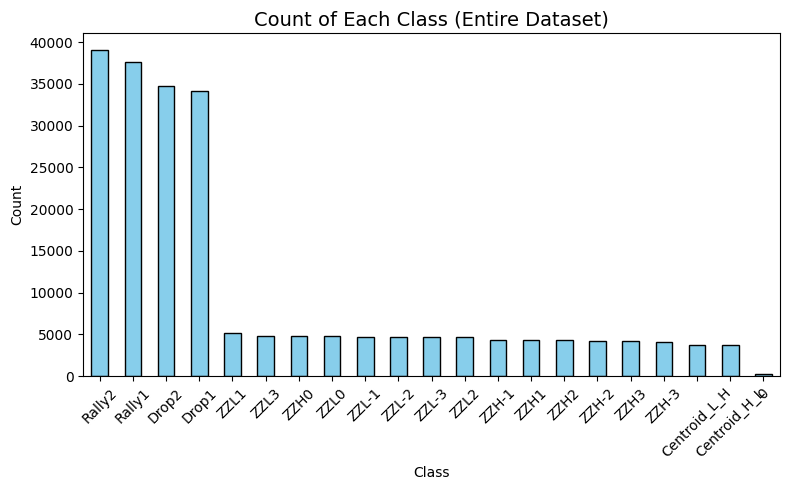

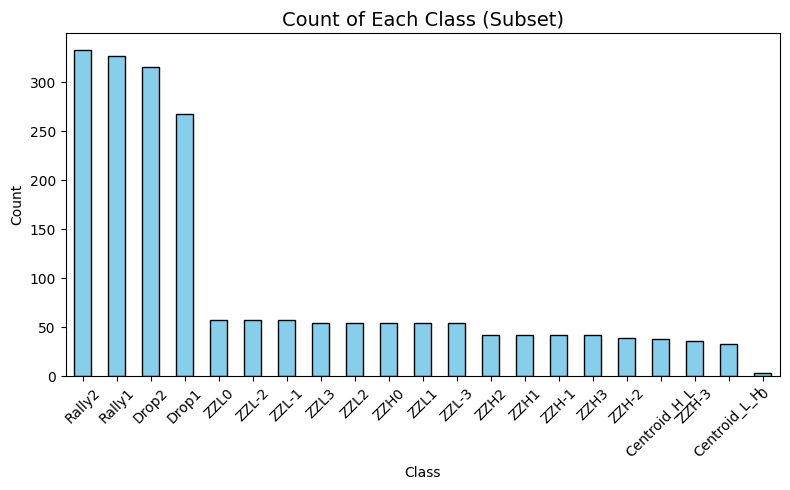

In [ ]:
# original class counts
class_counts = comb_df["LabelVerbal"].value_counts()

plt.figure(figsize=(8,5))
class_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Count of Each Class (Entire Dataset)", fontsize=14)
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("\n")


# grab how much this changes the distribution of classes
class_counts = df_selected["LabelVerbal"].value_counts()

plt.figure(figsize=(8,5))
class_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Count of Each Class (Subset)", fontsize=14)
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
class_counts

,count
LabelVerbal,
Rally2,333
Rally1,327
Drop2,315
Drop1,267
ZZL0,57
ZZL-2,57
ZZL-1,57
ZZL3,54
ZZL2,54


### Convert Pruned Datasets into Readable Format for ConvLSTM

In [ ]:
df_selected = pd.read_csv("/content/drive/MyDrive/DS260_SSSM/Project DS260/Siddhi's Code/select_subset_2000.csv",
                          usecols=lambda x: x not in ['Unnamed: 0', 'Unnamed: 0.1'])
comb_df_w_perplexity = comb_df_w_perplexity[df_selected.columns]
df_selected_w_low_perp_points = pd.concat([df_selected, comb_df_w_perplexity[comb_df_w_perplexity['perp_group'] == 'Low'].sample(frac=0.15, random_state=42)])
print("Number of rows:", len(df_selected_w_low_perp_points))
df_selected_w_low_perp_points = df_selected_w_low_perp_points.drop_duplicates()



Number of rows: 12748


In [ ]:
df_selected_w_low_perp_points.to_csv("/content/drive/MyDrive/DS260_SSSM/Project DS260/Siddhi's Code/dataframe_w_perp_and_div_v2.csv")

In [ ]:
df_selected_w_low_perp_points = pd.read_csv("/content/drive/MyDrive/DS260_SSSM/Project DS260/Siddhi's Code/select_subset_2000_only_perp.csv")

In [ ]:
# remove unnecessary columns from df

df_selected_w_low_perp_points['DateTime'] = pd.to_datetime(df_selected_w_low_perp_points['DateTime'])
df_core = df_selected_w_low_perp_points.drop(columns=["LabelVerbal", "NumericLabel",
                                    "narrative", "perplexity", "log_perplexity",
                                    "perp_group"])
df1_ = pd.read_csv(fp1, names=['Label_DateTime', "LabelVerbal", "NumericLabel"], header=0, parse_dates=['Label_DateTime'])
df1_['Label_Start'] = df1_['Label_DateTime'] - pd.Timedelta(minutes=15)
df_core = pd.merge_asof(
    df_core.sort_values('DateTime'),
    df1_.sort_values('Label_Start'),
    left_on = 'DateTime',
    right_on = 'Label_Start',
    direction='backward'
)
df_core = df_core[df_core['DateTime'] <= df_core['Label_DateTime']]
print(len(df_core))
df_core = df_core.drop(columns=["DateTime", "Label_Start"])
df_core = df_core.set_index("Label_DateTime")
df_core = df_core.sort_index()
display(df_core.head())

1990


,Unnamed: 0.1,Unnamed: 0,EURUSD@M5↦High,EURUSD@M5↦Low,Quant1,Quant2,Quant3,Quant4,Quant5,Quant6,...,Quant123,Quant124,Quant125,Quant126,Quant127,Quant128,Quant129,Quant130,LabelVerbal,NumericLabel
Label_DateTime,,,,,,,,,,,,,,,,,,,,,
2023-01-02 18:00:00,1344,144,1.06556,1.06523,1.07005,1.06749,1.06871,1.06510,26.4,23.3,...,NaN,NaN,45.4,36.8,83.8,58.6,68.2,48.4,Drop2,-3
2023-01-03 19:30:00,809,451,1.05568,1.05468,1.06802,1.05196,1.05974,1.05372,47.4,32.9,...,1.36797,1.36018,76.0,67.6,68.8,55.4,68.1,43.8,Rally2,3
2023-01-06 17:15:00,469,1288,1.06136,1.06054,1.05161,1.04832,1.05013,1.04865,84.6,86.4,...,1.35376,1.36645,9.7,14.5,1.7,6.6,4.6,14.3,Rally1,1
2023-01-06 17:45:00,693,1292,1.06130,1.06038,1.05161,1.04832,1.05013,1.04865,60.4,62.9,...,1.35376,1.36645,12.5,14.6,15.3,18.8,32.5,29.8,Rally1,1
2023-01-06 18:00:00,1253,1296,1.06212,1.06149,1.05161,1.04832,1.05013,1.04865,65.1,66.1,...,1.35376,1.36645,7.3,9.5,13.5,11.1,0.0,0.0,Rally1,1


In [ ]:
def sliding_windows_2d(X, window):
    """
    Convert 2D array (rows, features) into sliding windows (N, window, features).
    This is crucial for ConvLSTMs as they need a history of information to
    make a prediction.
    """

    if len(X) < window:
        return np.empty((0, window, X.shape[1]))

    return np.squeeze(
        np.lib.stride_tricks.sliding_window_view(X, (window, X.shape[1])),
        axis=1
    )

In [ ]:
# Rewritten by Soroush to take into account the exact time sequences for the full dataset

def create_classification_sequences(
        core_df,
        labels_full_df,
        keep_times_df=None,        # <== NEW: DataFrame that defines which DateTimes to keep
        time_step=200,
        check_zero_cols=False,
        max_label_shift_bars=4,    # <= 4 bars difference allowed
        bar_minutes=5,             # 1 bar = 5 minutes
):
    """
    core_df        : M5 input (DateTime index)
    labels_full_df : M15 labels (DateTime index, 1 col)
    keep_times_df  : DataFrame whose DateTimes define which label times to keep.
                     - If None  -> keep ALL valid sequences
                     - If not None:
                        * If its index is DateTimeIndex -> use index
                        * Else if it has 'DateTime' column -> use that column
                        * Other columns are ignored

    Returns:
        X_5d      : (N, time_step, 1, F, 1)
        y_labels  : (N,)
        t_seq     : (N,) np.datetime64 end time of each INPUT window
    """

    # ---- 0) resolve keep_times ----
    keep_times = None
    if keep_times_df is not None:
        df_keep = keep_times_df.copy()

        if isinstance(df_keep.index, pd.DatetimeIndex):
            keep_times = np.unique(df_keep.index.values.astype('datetime64[ns]'))
            print("keep_times:", keep_times)
            print("len of keep_times:", len(keep_times))
        elif 'DateTime' in df_keep.columns:
            dt_col = pd.to_datetime(df_keep['DateTime'])
            keep_times = dt_col.values.astype('datetime64[ns]')
        else:
            raise ValueError(
                "keep_times_df must have a DatetimeIndex or a 'DateTime' column."
            )

    # ---- 1) basic cleanup for labels ----
    if isinstance(labels_full_df, pd.Series):
        labels_full_df = labels_full_df.to_frame()

    label_col = labels_full_df.columns[0]

    c1 = core_df.dropna()
    labels = labels_full_df.dropna()

    idx = c1.index.values              # core times (M5)
    idy = labels.index.values          # label times (M15)

    X = c1.to_numpy()                  # (Nc, F)
    Y = labels[label_col].to_numpy()   # (Nl,)

    print("X.shape", X.shape)
    print("Y.shape", Y.shape)

    tL = int(time_step)

    # ---- 2) sliding windows on core ----
    low_windows = sliding_windows_2d(X, tL)             # (Nwin, tL, F)
    n_win = low_windows.shape[0]

    # end index for each window in core index
    end_pos = np.arange(tL - 1, tL - 1 + n_win)
    end_times = idx[end_pos]                     # (Nwin,) end time of each window (M5 index)

    # ---- 3) no-NaN mask ----
    print("Low windows:", low_windows)
    print("Low windows shape:", low_windows.shape)
    ok_nan = ~np.isnan(low_windows).any(axis=(1, 2))   # (Nwin,)

    print("ok_nan shape:", ok_nan.shape)

    # ---- 4) zero-column mask (if needed) ----
    if check_zero_cols:
        cols_keep = [
            i for i, col in enumerate(c1.columns)
            if ("RSI" not in col and "ZigZagFlag" not in col)
        ]
        if cols_keep:
            ok_zero = (low_windows[:, :, cols_keep] != 0).all(axis=(1, 2))
        else:
            ok_zero = np.ones(n_win, dtype=bool)
    else:
        ok_zero = np.ones(n_win, dtype=bool)

    print("ok_zero shape:", ok_zero.shape)

    # ---- 5) label alignment with ±4-bar tolerance ----
    max_delta = np.timedelta64(max_label_shift_bars * bar_minutes, 'm')

    pos_right = np.searchsorted(idy, end_times, side="right")
    prev_idx  = pos_right - 1
    next_idx  = pos_right

    prev_valid = (prev_idx >= 0)
    next_valid = (next_idx < len(idy))

    big_td = np.timedelta64(10**9, 'm')

    dt_prev = np.full(n_win, big_td, dtype='timedelta64[m]')
    dt_next = np.full(n_win, big_td, dtype='timedelta64[m]')

    dt_prev[prev_valid] = np.abs(end_times[prev_valid] - idy[prev_idx[prev_valid]])
    dt_next[next_valid] = np.abs(end_times[next_valid] - idy[next_idx[next_valid]])

    use_prev   = dt_prev <= dt_next
    chosen_idx = np.where(use_prev, prev_idx, next_idx)
    chosen_dt  = np.where(use_prev, dt_prev, dt_next)

    chosen_valid = (prev_valid | next_valid) & (chosen_dt <= max_delta)

    # label for each window (0 if no valid label)
    y_seq = np.zeros((n_win,), dtype=Y.dtype)
    y_seq[chosen_valid] = Y[chosen_idx[chosen_valid]]

    # label time for each window
    label_times_for_windows = np.full(n_win, np.datetime64('NaT'), dtype='datetime64[ns]')
    label_times_for_windows[chosen_valid] = idy[chosen_idx[chosen_valid]]

    ok_y = chosen_valid
    print("ok_y shape:", ok_y.shape)

    print("label_times_for_windows:", label_times_for_windows)
    print("len of label_times_for_windows:", len(label_times_for_windows))

    # ---- 6) filter by keep_times_df (if provided) ----
    if keep_times is not None:
        print(keep_times.dtype)
        print(label_times_for_windows.dtype)
        in_keep = np.isin(label_times_for_windows, keep_times)
    else:
        in_keep = np.ones(n_win, dtype=bool)

    # ---- 7) combine all masks ----
    ok_all = ok_nan & ok_zero & ok_y & in_keep    # length = Nwin

    print("in_keep:", in_keep)
    print("in_keep sum:", in_keep.sum())

    print("ok_nan:", ok_nan)
    print("ok_zero:", ok_zero)
    print("ok_y:", ok_y)
    print("ok_all:", ok_all)

    low_final = low_windows[ok_all]        # (N_keep, tL, F)
    print("low_final:", low_final.shape)
    y_final = y_seq[ok_all]              # (N_keep,)
    print("y_final:", y_final.shape)
    t_final = end_times[ok_all]          # (N_keep,) from INPUT index
    print("t_final:", t_final.shape)

    if len(low_final) == 0:
        print("[classification] No valid sequences after alignment.")
        return (
            np.empty((0, tL, 1, X.shape[1], 1)),
            np.empty((0,), dtype=Y.dtype),
            np.empty((0,), dtype='datetime64[ns]'),
        )

    # ---- 8) reshape for ConvLSTM: (N, tL, 1, F, 1) ----
    low_5d = np.expand_dims(low_final[:, :, :, None], axis=2)

    y_labels = y_final.squeeze()
    if y_labels.ndim != 1:
        y_labels = y_labels.reshape(-1)

    print(f"[classification] Candidates={low_windows.shape[0]}  Kept={len(low_final)}")
    print("[classification] Unique labels:", np.unique(y_labels))

    # Return INPUT-based time index (for matching)
    return low_5d, y_labels, t_final

In [ ]:
# generate ConvLSTM sequences with 200 timesteps
X, y, t_seq = create_classification_sequences(df2, df1, df_core)

print("X shape (ConvLSTM-ready):", X.shape)
print("y shape:", y.shape)
print("t_seq shape:", t_seq.shape)

keep_times: ['2023-01-02T18:00:00.000000000' '2023-01-03T19:30:00.000000000'
 '2023-01-06T17:15:00.000000000' ... '2025-11-24T13:00:00.000000000'
 '2025-11-24T13:15:00.000000000' '2025-11-24T13:30:00.000000000']
len of keep_times: 1576
X.shape (216969, 132)
Y.shape (147003,)
Low windows: [[[  1.06546   1.06529   1.06749 ...  45.3      74.8      63.3    ]
  [  1.06531   1.06522   1.06749 ...  66.7      41.9      63.3    ]
  [  1.06529   1.06525   1.06749 ...  69.4      47.9      47.6    ]
  ...
  [  1.05313   1.05252   1.06493 ...  69.       63.1      69.6    ]
  [  1.0533    1.05268   1.06493 ...  74.1     100.       89.9    ]
  [  1.05323   1.05258   1.06493 ...  70.9     100.       90.4    ]]

 [[  1.06531   1.06522   1.06749 ...  66.7      41.9      63.3    ]
  [  1.06529   1.06525   1.06749 ...  69.4      47.9      47.6    ]
  [  1.06531   1.06524   1.06749 ...  72.2      54.4      80.     ]
  ...
  [  1.0533    1.05268   1.06493 ...  74.1     100.       89.9    ]
  [  1.05323   1.

In [ ]:
#  import numpy as np

# TODO: here i want to make sure im including the exact 200 time steps behind the selected data points
# rather right now it's only taking the N preceding times steps of the pruned dataset into account

# def create_sequences_for_convlstm(core_df, label_df, time_step=200, max_label_shift=4, bar_minutes=1000000):
#     """
#     Convert core_df and label_df into ConvLSTM-ready sequences.

#     Returns:
#         X_5d: (N, time_step, 1, F, 1)
#         y_labels: (N,)
#         end_times: (N,) datetime64 of sequence end
#     """

#     # ----------------------------------------------------------------------
#     # 1. Prepare core matrix and index
#     # ----------------------------------------------------------------------
#     X = core_df.dropna().to_numpy()            # (rows, features)
#     core_idx = core_df.dropna().index.values   # aligned with X

#     n_features = X.shape[1]

#     label_col = label_df.columns[0]
#     Y = label_df[label_col].to_numpy()
#     label_idx = label_df.index.values

#     # ----------------------------------------------------------------------
#     # 2. Build sliding windows
#     #    Expected output: (n_windows, time_step, n_features)
#     # ----------------------------------------------------------------------
#     def sliding_windows_2d(arr, T):
#         """
#         Correct sliding window implementation that guarantees
#         output shape = (n_windows, T, n_features)
#         """
#         n = arr.shape[0]
#         if n < T:
#             return np.empty((0, T, arr.shape[1]))

#         # Build windows
#         n_win = n - T + 1
#         out = np.zeros((n_win, T, arr.shape[1]), dtype=arr.dtype)

#         for i in range(n_win):
#             out[i] = arr[i:i+T]

#         return out

#     windows = sliding_windows_2d(X, time_step)  # (n_win, time_step, n_features)
#     n_win = windows.shape[0]

#     # ----------------------------------------------------------------------
#     # 3. End timestamps (correct alignment)
#     # ----------------------------------------------------------------------
#     end_times = core_idx[time_step-1 : time_step-1+n_win]

#     # ----------------------------------------------------------------------
#     # 4. Mask: remove windows with NaN or all zeros
#     # ----------------------------------------------------------------------
#     ok_nan  = ~np.isnan(windows).any(axis=(1,2))
#     ok_zero = ~np.all(windows == 0, axis=(1,2))

#     # ----------------------------------------------------------------------
#     # 5. Label alignment within max_label_shift bars (time tolerance)
#     # ----------------------------------------------------------------------
#     max_delta = np.timedelta64(max_label_shift * bar_minutes, 'm')

#     pos = np.searchsorted(label_idx, end_times)
#     prev_idx = np.clip(pos-1, 0, len(label_idx)-1)
#     next_idx = np.clip(pos,   0, len(label_idx)-1)

#     dt_prev = np.abs(end_times - label_idx[prev_idx])
#     dt_next = np.abs(end_times - label_idx[next_idx])

#     use_prev  = dt_prev <= dt_next
#     chosen_idx = np.where(use_prev, prev_idx, next_idx)
#     chosen_dt  = np.where(use_prev, dt_prev, dt_next)

#     ok_y = chosen_dt <= max_delta

#     y_seq = np.zeros(n_win, dtype=Y.dtype)
#     y_seq[ok_y] = Y[chosen_idx[ok_y]]

#     # ----------------------------------------------------------------------
#     # 6. Combine masks
#     # ----------------------------------------------------------------------
#     ok_all = ok_nan & ok_zero & ok_y

#     final_windows = windows[ok_all]     # shape guaranteed: (N, time_step, features)
#     final_labels  = y_seq[ok_all]
#     final_times   = end_times[ok_all]

#     # ----------------------------------------------------------------------
#     # 7. Final reshape for ConvLSTM:
#     #       (N, time_step, 1, features, 1)
#     # ----------------------------------------------------------------------
#     if len(final_windows) == 0:
#         return (
#             np.empty((0, time_step, 1, n_features, 1)),
#             np.empty((0,)),
#             np.empty((0,), dtype='datetime64[ns]')
#         )

#     # *** CRITICAL FIX ***
#     # Ensure windows are exactly (N, T, F)
#     if final_windows.ndim != 3:
#         raise ValueError("final_windows must be 3D (N, time_step, features). Got: " + str(final_windows.shape))

#     N, T, F = final_windows.shape

#     print("Total windows:", n_win)
#     print("ok_nan sum:", ok_nan.sum())
#     print("ok_zero sum:", ok_zero.sum())
#     print("ok_y sum:", ok_y.sum())
#     print("ok_all sum:", ok_all.sum())

#     # reshape into ConvLSTM format
#     X_5d = final_windows.reshape(N, T, 1, F, 1)

#     return X_5d, final_labels, final_times


### Run ConvLSTM for Accuracies

In [ ]:
# run this through ConvLSTM highlighted by Ai_Model_codes.py

# ---------------- Label Mapping & Class Weights ----------------
unique_labels = np.unique(y)
label2idx = {lab:i for i, lab in enumerate(unique_labels)}
idx2label = {i:lab for lab, i in label2idx.items()}
num_classes = len(unique_labels)
y_idx = np.array([label2idx[lab] for lab in y], dtype=np.int32)

classes_present = np.unique(y_idx)
weights = compute_class_weight(class_weight="balanced",
                               classes=classes_present,
                               y=y_idx)
class_weights = {int(c): float(w) for c,w in zip(classes_present, weights)}
for c in range(num_classes):
    class_weights.setdefault(c, 1.0)

# ---------------- Train/Test Split ----------------
X_train, X_val, y_train, y_val = train_test_split(
    X, y_idx, test_size=0.2, random_state=42, stratify=y_idx
)

# ---------------- ConvLSTM Model Builder ----------------
def build_big_mwps_classifier(time_steps, n_features, num_classes,
                              l2_reg=1e-5, dropout_rate=0.3):
    reg = regularizers.l2(l2_reg)
    inp = layers.Input(shape=(time_steps, 1, n_features, 1), name="X_low")

    # Block 1
    x = layers.ConvLSTM2D(128, (1,5), padding="same", return_sequences=True,
                          kernel_regularizer=reg, recurrent_regularizer=reg, bias_regularizer=reg)(inp)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)

    # Block 2
    x = layers.ConvLSTM2D(256, (1,5), padding="same", return_sequences=True,
                          kernel_regularizer=reg, recurrent_regularizer=reg, bias_regularizer=reg)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)

    # Block 3
    x = layers.ConvLSTM2D(256, (1,5), padding="same", return_sequences=False,
                          kernel_regularizer=reg, recurrent_regularizer=reg, bias_regularizer=reg)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)

    # Global pooling
    x = layers.GlobalAveragePooling2D()(x)

    # Dense head
    x = layers.Dense(1024, activation="relu", kernel_regularizer=reg, bias_regularizer=reg)(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(512, activation="relu", kernel_regularizer=reg, bias_regularizer=reg)(x)
    x = layers.Dropout(dropout_rate)(x)

    out = layers.Dense(num_classes, activation="softmax")(x)

    model = models.Model(inputs=inp, outputs=out)
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=["accuracy"])
    return model

# ---------------- Build & Train ----------------
model = build_big_mwps_classifier(time_steps=X.shape[1], n_features=X.shape[3], num_classes=num_classes)
model.summary()

callbacks = [tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, verbose=1)]

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    class_weight=class_weights,
    # class_weight = 'balanced',
    callbacks=callbacks,
    verbose=2
)

# ---------------- Evaluate ----------------
loss, acc = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {loss:.4f}, Accuracy: {acc:.4f}")

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ X_low (InputLayer)              │ (None, 200, 1, 132, 1) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d (ConvLSTM2D)        │ (None, 200, 1, 132,    │       330,752 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 200, 1, 132,    │           512 │
│ (BatchNormalization)            │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200, 1, 132,    │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_1 (ConvLSTM2D)      │ (None, 200, 1, 132,    │     1,967,104 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 200, 1, 132,    │         1,024 │
│ (BatchNormalization)            │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200, 1, 132,    │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_2 (ConvLSTM2D)      │ (None, 1, 132, 256)    │     2,622,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1, 132, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 132, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 21)             │        10,773 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,721,621 (21.83 MB)

 Trainable params: 5,720,341 (21.82 MB)

 Non-trainable params: 1,280 (5.00 KB)

Epoch 1/50
119/119 - 179s - 2s/step - accuracy: 0.0430 - loss: 3.0996 - val_accuracy: 0.0148 - val_loss: 3.1009
Epoch 2/50
119/119 - 130s - 1s/step - accuracy: 0.0625 - loss: 2.9683 - val_accuracy: 0.0496 - val_loss: 2.9618
Epoch 3/50
119/119 - 129s - 1s/step - accuracy: 0.0702 - loss: 2.7987 - val_accuracy: 0.0380 - val_loss: 3.0574
Epoch 4/50
119/119 - 129s - 1s/step - accuracy: 0.0966 - loss: 2.6305 - val_accuracy: 0.1108 - val_loss: 2.7851
Epoch 5/50
119/119 - 129s - 1s/step - accuracy: 0.1119 - loss: 2.4947 - val_accuracy: 0.0981 - val_loss: 2.8641
Epoch 6/50
119/119 - 129s - 1s/step - accuracy: 0.1372 - loss: 2.3953 - val_accuracy: 0.1097 - val_loss: 2.9321
Epoch 7/50
119/119 - 130s - 1s/step - accuracy: 0.1489 - loss: 2.3032 - val_accuracy: 0.1361 - val_loss: 2.7379
Epoch 8/50
119/119 - 129s - 1s/step - accuracy: 0.1776 - loss: 2.1834 - val_accuracy: 0.1793 - val_loss: 2.5754
Epoch 9/50
119/119 - 130s - 1s/step - accuracy: 0.2030 - loss: 2.0574 - val_accuracy: 0.1825 - val_loss:

Epoch 1/50
45/45 - 71s - 2s/step - accuracy: 0.0354 - loss: 3.0456 - val_accuracy: 0.0278 - val_loss: 3.0494
Epoch 2/50
45/45 - 50s - 1s/step - accuracy: 0.0583 - loss: 3.0405 - val_accuracy: 0.0111 - val_loss: 3.0451
Epoch 3/50
45/45 - 50s - 1s/step - accuracy: 0.0646 - loss: 3.0428 - val_accuracy: 0.0250 - val_loss: 3.0500
Epoch 4/50
45/45 - 50s - 1s/step - accuracy: 0.0618 - loss: 3.0414 - val_accuracy: 0.0278 - val_loss: 3.0496
Epoch 5/50
45/45 - 50s - 1s/step - accuracy: 0.0833 - loss: 3.0381 - val_accuracy: 0.0500 - val_loss: 3.0350
Epoch 6/50
45/45 - 50s - 1s/step - accuracy: 0.0812 - loss: 3.0341 - val_accuracy: 0.0333 - val_loss: 3.0592
Epoch 7/50
45/45 - 50s - 1s/step - accuracy: 0.0979 - loss: 3.0228 - val_accuracy: 0.0472 - val_loss: 3.0449
Epoch 8/50
45/45 - 50s - 1s/step - accuracy: 0.0806 - loss: 3.0019 - val_accuracy: 0.0361 - val_loss: 3.1509
Epoch 9/50
45/45 - 50s - 1s/step - accuracy: 0.0931 - loss: 2.9684 - val_accuracy: 0.1333 - val_loss: 2.9502
Epoch 10/50
45/45 -

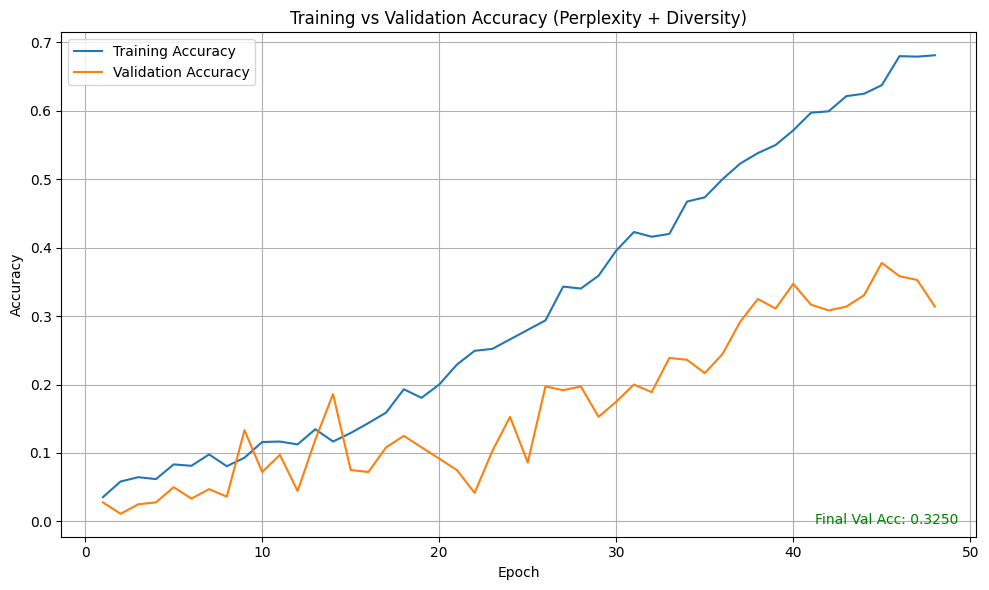

In [ ]:
# ablation charts

import re
import requests
import matplotlib.pyplot as plt

# ---- Published CSV URL (no login required) ----
SHEET_ID = "1fH19RTKD78IXcxYmNo_cIXoGapo8KcmYP1zj8uH-6AI"
GID = "0"   # or the gid of your tab

CSV_URL = f"https://docs.google.com/spreadsheets/d/{SHEET_ID}/export?format=csv&gid={GID}"

# Download data from Google Sheets
csv_text = requests.get(CSV_URL).text
print(csv_text)

rows = csv_text.split("\n")
rows = [r.strip() for r in rows if r.strip()]   # remove empty rows

print(rows)


# ---- Arrays ----
epochs = []
acc = []
val_acc = []
loss = []
val_loss = []

# Patterns
epoch_pattern = r"Epoch\s+(\d+)/(\d+)"
metrics_pattern = (
    r"accuracy:\s*([0-9.]+)\s*-\s*loss:\s*([0-9.]+)\s*-\s*val_accuracy:\s*([0-9.]+)\s*-\s*val_loss:\s*([0-9.]+)"
)

i = 0
while i < len(rows):
    line = rows[i]

    # If row is an Epoch line
    epoch_match = re.search(epoch_pattern, line)
    if epoch_match and i + 1 < len(rows):

        # Extract epoch number
        epochs.append(int(epoch_match.group(1)))

        # Next row contains metrics
        metric_match = re.search(metrics_pattern, rows[i + 1])
        if metric_match:
            acc.append(float(metric_match.group(1)))
            loss.append(float(metric_match.group(2)))
            val_acc.append(float(metric_match.group(3)))
            val_loss.append(float(metric_match.group(4)))

        i += 2
    else:
        i += 1


# ---- Final Validation Row ----
# Example row: "Validation Loss: 2.5286, Accuracy: 0.3694"
final_val_acc = None
final_val_match = re.search(r"Accuracy:\s*([0-9.]+)", rows[-1])
if final_val_match:
    final_val_acc = float(final_val_match.group(1))


# ---- Plot ----
plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, label="Training Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")

# Label final validation accuracy
if final_val_acc is not None:
    plt.text(
        0.98, 0.02,
        f"Final Val Acc: {final_val_acc:.4f}",
        transform=plt.gca().transAxes,
        ha="right", va="bottom",
        fontsize=10,
        color="green"
    )

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy (Perplexity + Diversity)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
